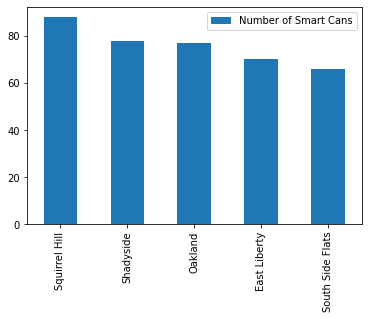

In [2]:
import pandas as pd
import numpy as np

smartcans = pd.read_csv("Trash.csv")

i = 0
temp_num = 0
num_of_cans = []
neighborhoods = []
while(i < len(smartcans)):
    if(smartcans.loc[i,'neighborhood'] in neighborhoods):
        temp_num = num_of_cans[neighborhoods.index(smartcans.loc[i,'neighborhood'])]
        temp_num += 1
        num_of_cans[neighborhoods.index(smartcans.loc[i,'neighborhood'])] = temp_num
        i += 1
    else:
        temp_num = 1
        neighborhoods.append(smartcans.loc[i,'neighborhood'])
        num_of_cans.append(temp_num)
        i += 1
    
num_of_cans[neighborhoods.index("Squirrel Hill North")] += num_of_cans[neighborhoods.index("Squirrel Hill South")]
del(num_of_cans[neighborhoods.index("Squirrel Hill South")])
del(neighborhoods[neighborhoods.index("Squirrel Hill South")])
neighborhoods[neighborhoods.index("Squirrel Hill North")] = "Squirrel Hill"

num_of_cans[neighborhoods.index("Central Oakland")] += num_of_cans[neighborhoods.index("South Oakland")]
num_of_cans[neighborhoods.index("Central Oakland")] += num_of_cans[neighborhoods.index("North Oakland")]
num_of_cans[neighborhoods.index("Central Oakland")] += num_of_cans[neighborhoods.index("West Oakland")]
del(num_of_cans[neighborhoods.index("South Oakland")])
del(neighborhoods[neighborhoods.index("South Oakland")])
del(num_of_cans[neighborhoods.index("North Oakland")])
del(neighborhoods[neighborhoods.index("North Oakland")])
del(num_of_cans[neighborhoods.index("West Oakland")])
del(neighborhoods[neighborhoods.index("West Oakland")])
neighborhoods[neighborhoods.index("Central Oakland")] = "Oakland"

sums = pd.DataFrame(num_of_cans, index=neighborhoods, columns = ["Number of Smart Cans"])
sums.sort_values(by=["Number of Smart Cans"], inplace=True, ascending=False)

sums.head(5).plot.bar()

# Rationale
I chose to use the number of smart trash cans as a metric of neighborhood quality because it implies the following

- That the city sees the neighborhood as one worth investing in the most with newer infrastructure
- That littering tends to be rare enough where the increase in trash cans, let alone "smart" ones is seen as a public work that will be used
- That there is enough environmentalist sentiment amongst the population so that such a project would be seen as useful and not as a "waste" of tax money compared to other projects more focused on day-to-day needs


# Code Explanation
The above code does the following:

1. Creates a dataframe from the CSV file
2. Condenses the data so that the columns are neighborhoods and not individual cans, and that all the cans for said neighborhood are the rows
3. Combines "divided" neighborhoods (North/South Squrrel Hill, North/South/Central/West Oakland) into singular neighborhoods to keep the data points consistent with other data sets classifications of neighborhoods
4. Creates a bar graph of the top five neighborhoods in terms of the number of smart cans

# Analysis and Conclusion
While the number of parking meters is indicative of historical investment from the city, which in a vaccum may not indicate current "quality" of the neighborhood, the smart-trash-cans, being a newer development, represent the city's current willingness to invest in it. As the graph shows, Squirrel Hill, being in first, shows that the city is willing to invest the most money into it for newer developments. This shows a faith in the neighborhood by the city in its prospects for long-term sustained prosperity, also known in this analysis as "quality"